In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from db_connection import get_engine

%matplotlib inline

engine = get_engine()

## Load Baseline Data

In [2]:
def load_baseline():
    query = """
        SELECT
            p.product_id,
            p.name,
            p.price,
            p.stock,
            SUM(oi.quantity) AS total_sold,
            AVG(oi.total_price / oi.quantity) AS avg_price_sold
        FROM products p
        LEFT JOIN order_items oi ON p.product_id = oi.product_id
        WHERE p.is_active = TRUE
        GROUP BY p.product_id, p.name, p.price, p.stock
    """
    df = pd.read_sql(query, engine)
    df["baseline_revenue"] = df["total_sold"] * df["avg_price_sold"]
    return df

baseline = load_baseline()
print(f"Loaded {len(baseline)} products.")
baseline.head()

Loaded 25 products.


,product_id,name,price,stock,total_sold,avg_price_sold,baseline_revenue
0,72,Apples,2.1,70,NaN,NaN,NaN
1,78,Cereal,3.4,55,NaN,NaN,NaN
2,73,Bananas,1.8,100,NaN,NaN,NaN
3,44,Disco SSD 2TB,130.0,35,1003.0,130.0,130390.0
4,81,Soda,2.0,110,NaN,NaN,NaN


## Scenario 1: Price Increase

In [3]:
# Assume 10% price increase reduces sales by 5%
price_increase_pct = 0.10
sales_drop_pct = 0.05

baseline["new_price"] = baseline["price"] * (1 + price_increase_pct)
baseline["simulated_sold"] = baseline["total_sold"] * (1 - sales_drop_pct)
baseline["simulated_revenue"] = baseline["simulated_sold"] * baseline["new_price"]

print("Price Increase Simulation:")
print(f"Baseline Total Revenue: {baseline['baseline_revenue'].sum():.2f}")
print(f"Simulated Total Revenue: {baseline['simulated_revenue'].sum():.2f}")
print(f"Revenue Change: {((baseline['simulated_revenue'].sum() - baseline['baseline_revenue'].sum()) / baseline['baseline_revenue'].sum() * 100):.2f}%")

Price Increase Simulation:
Baseline Total Revenue: 143210.00
Simulated Total Revenue: 158643.54
Revenue Change: 10.78%


## Scenario 2: Stock Changes

In [4]:
# Assume increasing stock by 20% increases sales by 10%
stock_increase_pct = 0.20
sales_increase_pct = 0.10

baseline["new_stock"] = baseline["stock"] * (1 + stock_increase_pct)
baseline["simulated_sold_stock"] = baseline["total_sold"] * (1 + sales_increase_pct)
baseline["simulated_revenue_stock"] = baseline["simulated_sold_stock"] * baseline["price"]

print("Stock Increase Simulation:")
print(f"Baseline Total Revenue: {baseline['baseline_revenue'].sum():.2f}")
print(f"Simulated Total Revenue: {baseline['simulated_revenue_stock'].sum():.2f}")
print(f"Revenue Change: {((baseline['simulated_revenue_stock'].sum() - baseline['baseline_revenue'].sum()) / baseline['baseline_revenue'].sum() * 100):.2f}%")

Stock Increase Simulation:
Baseline Total Revenue: 143210.00
Simulated Total Revenue: 166993.20
Revenue Change: 16.61%


## Scenario 3: Promotion

In [5]:
# Assume promotion reduces price by 15%, increases sales by 30%
promo_discount_pct = 0.15
sales_boost_pct = 0.30

baseline["promo_price"] = baseline["price"] * (1 - promo_discount_pct)
baseline["simulated_sold_promo"] = baseline["total_sold"] * (1 + sales_boost_pct)
baseline["simulated_revenue_promo"] = baseline["simulated_sold_promo"] * baseline["promo_price"]

print("Promotion Simulation:")
print(f"Baseline Total Revenue: {baseline['baseline_revenue'].sum():.2f}")
print(f"Simulated Total Revenue: {baseline['simulated_revenue_promo'].sum():.2f}")
print(f"Revenue Change: {((baseline['simulated_revenue_promo'].sum() - baseline['baseline_revenue'].sum()) / baseline['baseline_revenue'].sum() * 100):.2f}%")

Promotion Simulation:
Baseline Total Revenue: 143210.00
Simulated Total Revenue: 167752.26
Revenue Change: 17.14%


## Visualize Scenarios

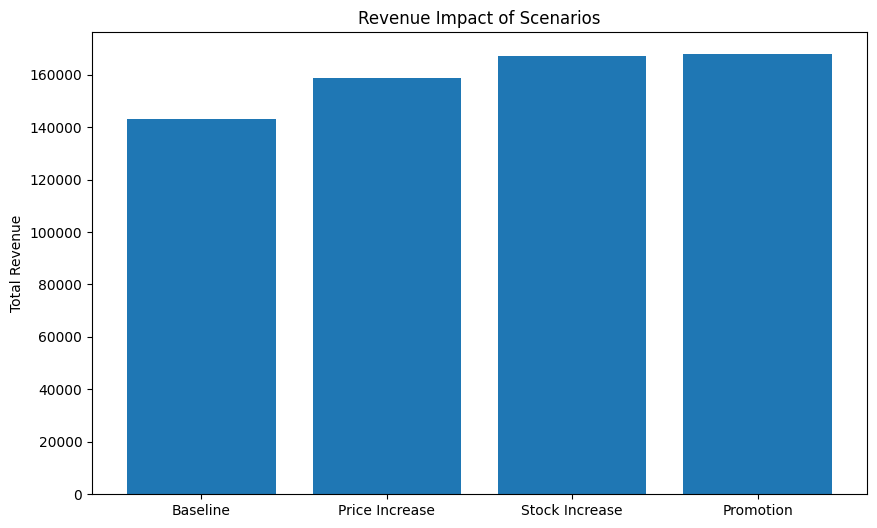

In [6]:
scenarios = {
    "Baseline": baseline["baseline_revenue"].sum(),
    "Price Increase": baseline["simulated_revenue"].sum(),
    "Stock Increase": baseline["simulated_revenue_stock"].sum(),
    "Promotion": baseline["simulated_revenue_promo"].sum()
}

plt.figure(figsize=(10, 6))
plt.bar(scenarios.keys(), scenarios.values())
plt.title("Revenue Impact of Scenarios")
plt.ylabel("Total Revenue")
plt.show()